<a href="https://colab.research.google.com/github/pmukeshreddy/horse-or-human-basic-cnn/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip


--2022-10-25 18:16:10--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   105MB/s    in 1.4s    

2022-10-25 18:16:12 (105 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [27]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip


--2022-10-25 18:34:56--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  49.5MB/s    in 0.2s    

2022-10-25 18:34:57 (49.5 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [33]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

local_zip = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/validation-horse-or-human')
zip_ref.close()

In [3]:
import os

train_horse_dir = os.path.join("./horse-or-human/horses")
train_human_dir = os.path.join("./horse-or-human/humans")

In [31]:
validatioin_horse_dir = os.path.join("./validation-horse-or-human/horses")
validatioin_human_dir = os.path.join("./validation-horse-or-human/humans")

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_humans_names = os.listdir(train_human_dir)
print(train_humans_names[:10])

['horse11-7.png', 'horse17-9.png', 'horse40-1.png', 'horse23-5.png', 'horse46-0.png', 'horse34-3.png', 'horse29-3.png', 'horse37-4.png', 'horse42-8.png', 'horse37-2.png']
['human07-20.png', 'human16-27.png', 'human06-16.png', 'human04-06.png', 'human10-13.png', 'human02-13.png', 'human11-02.png', 'human14-25.png', 'human11-10.png', 'human08-14.png']


In [5]:
print("number of horse images is ",len(train_horse_names))
print("number of human images is ",len(train_humans_names))

number of horse images is  500
number of human images is  527


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4


pic_index = 0

In [7]:
fig=plt.gcf()
fig.set_size_inches(4*nrows,4*ncols)
pic_index += 8

next_horse_pix = [os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir,fname) for fname in train_humans_names[pic_index-8:pic_index]]

<Figure size 1152x1152 with 0 Axes>

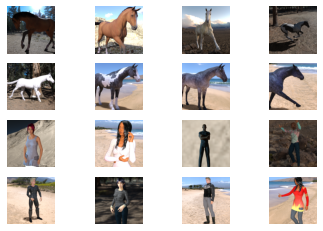

In [8]:
for i,img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows,ncols,i + 1 )
  sp.axis("off")
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [9]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [10]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation="relu",input_shape=(300,300,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",optimizer=RMSprop(learning_rate=0.001),metrics=["accuracy"])

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datgen = ImageDataGenerator(rescale=1/255)

train_genrator = train_datgen.flow_from_directory(
    './horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode="binary"
)

validation_datagen = train_datgen.flow_from_directory(
    "./validation-horse-or-human/",
    target_size = (300,300),
    batch_size = 32,
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
history = model.fit(train_genrator,steps_per_epoch=8,epochs=20,verbose=1,validation_data=validation_datagen,validation_steps=8)

Epoch 1/20
8/8 [==============================] - 8s 1s/step - loss: 0.0119 - accuracy: 0.9990 - val_loss: 1.2914 - val_accuracy: 0.8594
Epoch 2/20
8/8 [==============================] - 7s 892ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.6894 - val_accuracy: 0.8398
Epoch 3/20
8/8 [==============================] - 7s 884ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 2.1540 - val_accuracy: 0.8203
Epoch 4/20
8/8 [==============================] - 7s 888ms/step - loss: 1.2915 - accuracy: 0.8854 - val_loss: 0.9980 - val_accuracy: 0.8320
Epoch 5/20
8/8 [==============================] - 7s 896ms/step - loss: 0.0305 - accuracy: 0.9922 - val_loss: 1.2146 - val_accuracy: 0.8242
Epoch 6/20
8/8 [==============================] - 7s 901ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.5520 - val_accuracy: 0.8359
Epoch 7/20
8/8 [==============================] - 7s 891ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.7718 - val_accuracy: 0.8242
Epoch 8/20
8/8 [=======

In [26]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img,img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  path = "/content/"+fn
  img = load_img(path,target_size=(300,300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x,axis=0)
  images = np.vstack([x])
  classes = model.predict(images,batch_size=10)
  print(classes)
  if classes[0]>0.5:
    print(fn,"is human")
  else:
    print(fn,"is  horse")  



Saving wp3693523.jpeg to wp3693523 (2).jpeg
1/1 [==============================] - 0s 18ms/step
[[2.6036234e-10]]
wp3693523.jpeg is  horse
